# HW2.1: Image classification using logistic regression on MNIST data in Tensorflow Keras framework

Load handwritten digits data MNIST and build a logistic regression model using Tensorflow Keras framework to classify the digits. 

Informed via Keras documentation:
- https://keras.io/guides/sequential_model/
- https://keras.io/guides/training_with_built_in_methods/

Instructor: Shuo Zhang

Student: Madelyn Silveira

Date: 02/05/2025

In [146]:
# clear all variables in this workspace
%reset -f


## 1. Getting data and inspecting data

### load the data

In [147]:
from tensorflow.keras.datasets import mnist
(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = mnist.load_data()

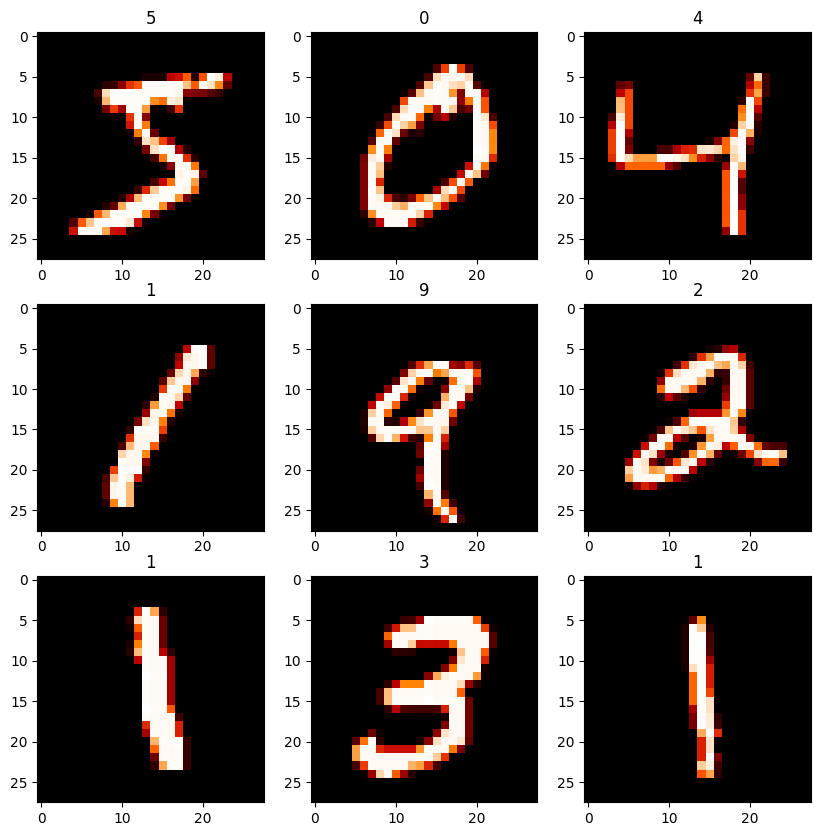

In [148]:
# show some images
import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches(10, 10)
for i in range(9):
  plt.subplot(3, 3, i+1)
  axis = plt.gca()
  axis.set_title(str(training_dataset_y[i]))
  plt.imshow(training_dataset_x[i].reshape(28, 28), cmap='gist_heat')
plt.show()

### inspect the data

In [149]:
us = "\033[4m"
ue = "\033[0m"

# 1. datatypes of datasets
print(f"1) {us}Inspect the datatypes of the datasets.{ue}")
print(f"The datatype of training_dataset_x is {type(training_dataset_x)} "
      f"containing 3-dimensional arrays of {type(training_dataset_x[0][0][0])}.")
print(f"The datatype of training_dataset_y is {type(training_dataset_y)} "
      f"containing one {type(training_dataset_y[0])} number label per element.\n")

# 2. dimensions of datasets
print(f"2) {us}Inspect the dimensions of the datasets.{ue}")
print(f"There are {training_dataset_x.ndim} dimensions of training_dataset_x. "
      f"They are of lengths {training_dataset_x.shape}.")
print(f"They indicate the number of images, and the dimensions of image.")
print(f"There is {training_dataset_y.ndim} dimension of training_dataset_y. "
      f"It is of length {training_dataset_y.shape}.")
print(f"It indiciates the number of labels for image examples.\n")

print(f"There are {test_dataset_x.ndim} dimensions of test_dataset_x. "
      f"They are of lengths {test_dataset_x.shape}.")
print(f"They indicate the number of images, and the dimensions of image.")
print(f"There is {test_dataset_y.ndim} dimension of test_dataset_y. "
      f"It is of length {test_dataset_y.shape}.")
print(f"It indiciates the number of labels for image examples.\n")

print(f"The dataset has been split into {len(training_dataset_x)} images "
      f"for training and {len(test_dataset_x)} images for testing.\n")

# 3. min and max values of the pixels of the images
print(f"3) {us}Inspect the minimum and maximum values of the pixels in the images.{ue}")
min_val = float('inf')
max_val = float('-inf')
for i in range(5):
      image = training_dataset_x[i]
      min_val = min(min_val, image.min())
      max_val = max(max_val, image.max())

print(f"The minimum value of the pixels in the images is {min_val}.")
print(f"The maximum value of the pixels in the images is {max_val}.\n")

1) Inspect the datatypes of the datasets.
The datatype of training_dataset_x is <class 'numpy.ndarray'> containing 3-dimensional arrays of <class 'numpy.uint8'>.
The datatype of training_dataset_y is <class 'numpy.ndarray'> containing one <class 'numpy.uint8'> number label per element.

2) Inspect the dimensions of the datasets.
There are 3 dimensions of training_dataset_x. They are of lengths (60000, 28, 28).
They indicate the number of images, and the dimensions of image.
There is 1 dimension of training_dataset_y. It is of length (60000,).
It indiciates the number of labels for image examples.

There are 3 dimensions of test_dataset_x. They are of lengths (10000, 28, 28).
They indicate the number of images, and the dimensions of image.
There is 1 dimension of test_dataset_y. It is of length (10000,).
It indiciates the number of labels for image examples.

The dataset has been split into 60000 images for training and 10000 images for testing.

3) Inspect the minimum and maximum value

### massage the data

In [150]:
from tensorflow.keras.utils import to_categorical

# 1. flatten each image into 1d array where z = x*y = 784
print(f"1) {us}Flatten each image into a 1D array.{ue}")
training_dataset_x_reshaped = training_dataset_x.reshape(training_dataset_x.shape[0], 28*28)
test_dataset_x_reshaped = test_dataset_x.reshape(test_dataset_x.shape[0], 28*28)
print(f"The old shape of training_dataset_x is {training_dataset_x.shape}.")
print(f"The new shape of training_dataset_x is {training_dataset_x_reshaped.shape}.\n")

# 2. normalize the pixel values to be between 0 and 1
print(f"2) {us}Normalize the pixel values to be between 0 and 1.{ue}")
training_dataset_x_normalized = training_dataset_x_reshaped / float(255)
test_dataset_x_normalized = test_dataset_x_reshaped / float(255)
new_min_val = float('inf')
new_max_val = float('-inf')
for i in range(5):
      image = training_dataset_x_normalized[i]
      new_min_val = min(new_min_val, image.min())
      new_max_val = max(new_max_val, image.max())
print(f"The nex minimum value is {new_min_val}.")
print(f"The new maximum value is {new_max_val}.\n")

# 3. convert labels to categorical data
print(f"3) {us}Convert labels to categorical data.{ue}")
print(f"The old category looks like {training_dataset_y[0]}.")
training_dataset_y_categorical = to_categorical(training_dataset_y)
test_dataset_y_categorical = to_categorical(test_dataset_y)
print(f"The new category looks like {training_dataset_y_categorical[0]}.")

# reexamine the dimensions of the datasets
print(f"The new training_dataset_y has {training_dataset_y_categorical.ndim} dimensions "
      f"of shape {training_dataset_y_categorical.shape}.")
print(f"The new test_dataset_y has {test_dataset_y_categorical.ndim} dimensions "
      f"of shape {test_dataset_y_categorical.shape}.")
print(f"This is because labels are now one-hot encoded numpy arrays.\n")

1) Flatten each image into a 1D array.
The old shape of training_dataset_x is (60000, 28, 28).
The new shape of training_dataset_x is (60000, 784).

2) Normalize the pixel values to be between 0 and 1.
The nex minimum value is 0.0.
The new maximum value is 1.0.

3) Convert labels to categorical data.
The old category looks like 5.
The new category looks like [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.].
The new training_dataset_y has 2 dimensions of shape (60000, 10).
The new test_dataset_y has 2 dimensions of shape (10000, 10).
This is because labels are now one-hot encoded numpy arrays.



In [151]:
# reset the names now that you've finished preprocessing
training_dataset_x = training_dataset_x_normalized
test_dataset_x = test_dataset_x_normalized
training_dataset_y = training_dataset_y_categorical
test_dataset_y = test_dataset_y_categorical

## 2. Build a logistic regression model

The multinomial logistic regression shown in the following figure consists of two layers: an input layer and an output layer, connected with a weight matrix W. 

<img src="logistic.png" alt="logisticRegression" width="400"/>

Create a (linear) logistic regression model in Keras with two layers. 

Input features = pixel values

Model = Sequential

Output number = 10

Input dimension = 748

Activation function = linear

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

# crate a sequential model
model = Sequential()

# add dense layer
model.add(Dense(units=10, input_shape=(784,), activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['categorical_accuracy'])

# print out a model summary
model.summary()

# train the model
hist = model.fit(training_dataset_x, training_dataset_y, 
                 epochs=10, batch_size=64, validation_split=0.2)

print(hist.history.keys())

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - categorical_accuracy: 0.7676 - loss: 0.9233 - val_categorical_accuracy: 0.9039 - val_loss: 0.3525
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 720us/step - categorical_accuracy: 0.9040 - loss: 0.3560 - val_categorical_accuracy: 0.9148 - val_loss: 0.3038
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - categorical_accuracy: 0.9136 - loss: 0.3119 - val_categorical_accuracy: 0.9213 - val_loss: 0.2925
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - categorical_accuracy: 0.9183 - loss: 0.2952 - val_categorical_accuracy: 0.9247 - val_loss: 0.2789
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - categorical_accuracy: 0.9196 - loss: 0.2831 - val_categorical_accuracy: 0.9228 - val_loss: 0.2749
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - categorical_accuracy: 0.9228 - loss: 0.2756 - val_categorical_accuracy: 0.9268 - val_loss: 0.2705
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - categorical_accuracy

### Add tensorboard visualization to keep track of training

Documentation: https://keras.io/api/callbacks/tensorboard/

In [141]:
# callback so Tensorflow writes record of training to `./logs` dir per epoch 
tb_callback = keras.callbacks.TensorBoard('./logs', update_freq=1)
hist = model.fit(training_dataset_x, training_dataset_y, epochs=10, batch_size=64,
validation_split=0.2,callbacks=[tb_callback])

# view tensorboard localhost
!tensorboard --logdir=logs

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.1717 - loss: 10.5225 - val_categorical_accuracy: 0.1754 - val_loss: 10.4773
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.1674 - loss: 10.5920 - val_categorical_accuracy: 0.1605 - val_loss: 11.0103
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.1392 - loss: 10.6172 - val_categorical_accuracy: 0.1350 - val_loss: 10.3047
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.1450 - loss: 10.3329 - val_categorical_accuracy: 0.1423 - val_loss: 9.3537
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.1337 - loss: 8.9834 - val_categorical_accuracy: 0.1388 - val_loss: 8.0036
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.1329 - loss: 8.6642 - val_categorical_accuracy: 0.1826 - val_loss: 8.4878
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.185

## 3. Evaluate the trained model

In [153]:
# test model on test data
eval_result = model.evaluate(test_dataset_x, test_dataset_y)
for i in range(len(eval_result)):
  print(f'{model.metrics_names[i]} ---> {eval_result[i]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - categorical_accuracy: 0.9151 - loss: 0.3049
loss ---> 0.2690677344799042
compile_metrics ---> 0.9257000088691711


## 4. Turn this model into a neural network

Input_layer = inferred from input dimensions

Hidden_layer = new dense layer with relu activation function

Output_layer = dense layer from previous linear model

In [160]:
# crate a new model
nn = Sequential()

# add a hidden, non-linear layer
nn.add(Dense(units=256, input_shape=(784,), activation='relu'))

# add an updated output layer
nn.add(Dense(units=10, activation='softmax'))

# compile the model
nn.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['categorical_accuracy'])

# print out a model summary
nn.summary()

# train the model
training_dataset_x_normalized
training_dataset_y_categorical
hist = nn.fit(training_dataset_x, training_dataset_y, 
                 epochs=10, batch_size=64, validation_split=0.2)

print(hist.history.keys())

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.8579 - loss: 0.4917 - val_categorical_accuracy: 0.9542 - val_loss: 0.1582
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9625 - loss: 0.1294 - val_categorical_accuracy: 0.9626 - val_loss: 0.1238
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9769 - loss: 0.0805 - val_categorical_accuracy: 0.9714 - val_loss: 0.0931
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9820 - loss: 0.0613 - val_categorical_accuracy: 0.9734 - val_loss: 0.0904
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9881 - loss: 0.0418 - val_categorical_accuracy: 0.9760 - val_loss: 0.0817
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9917 - loss: 0.0307 - val_categorical_accuracy: 0.9708 - val_loss: 0.0935
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.9929 - los

The model summary confirms the architecture of the model. Analyzing the model's
history shows the improvements in accuracy after every epoch. This model ended
with 99.74% categorical accuracy, which is pretty good!

In [162]:
# add another hidden layer to improve performance
nn = Sequential()
nn.add(Dense(units=512, input_shape=(784,), activation='relu'))
nn.add(Dense(units=256, activation='relu'))
nn.add(Dense(units=10, activation='softmax'))

# compile and summarize
nn.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['categorical_accuracy'])
hist = nn.fit(training_dataset_x, training_dataset_y, 
                 epochs=10, batch_size=64, validation_split=0.2)
print(hist.history.keys())


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - categorical_accuracy: 0.8835 - loss: 0.3969 - val_categorical_accuracy: 0.9637 - val_loss: 0.1220
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - categorical_accuracy: 0.9735 - loss: 0.0867 - val_categorical_accuracy: 0.9702 - val_loss: 0.1004
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - categorical_accuracy: 0.9837 - loss: 0.0538 - val_categorical_accuracy: 0.9712 - val_loss: 0.0978
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - categorical_accuracy: 0.9885 - loss: 0.0359 - val_categorical_accuracy: 0.9760 - val_loss: 0.0840
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - categorical_accuracy: 0.9922 - loss: 0.0235 - val_categorical_accuracy: 0.9776 - val_loss: 0.0861
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - categorical_accuracy: 0.9923 - loss: 0.0236 - val_categorical_accuracy: 0.9754 - val_loss: 0.0970
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - categorical_accuracy: 0.9934 - los

Adding another layer in this case did not improve the accuracy, although I didn't test every combination of unit sizes and activation functions.